## Christopher Estevez
### Data 608 HW4

 This week we will be looking at Enterococcus levels in the Hudson River, using data from the
organization Riverkeeper ( http://www.riverkeeper.org/).

Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans
and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water
quality indicator due to their abundance in human sewage, correlation with many human
pathogens and low abundance in sewage free environments. The United States
Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100
ml of water.

Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal
Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an
illness rate of 32 per 1000 swimmers.

The federal standard for unacceptable water quality is a single sample value of greater than
110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted
average) greater than 30 Enterococcus/100 mL.

Data: I have provided the data on our github page, in the folder
https://github.com/charleyferrari/CUNY_DATA608/tree/master/lecture4/Data. I have not
cleaned it – you need to do so.

This assignment must be done in python. It must be done using the ‘bokeh’, 'seaborn', or
'pandas' package. You may turn in either a . py file or an ipython notebook file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')
#pd.options.display.mpl_style = 'default'
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

URL = 'https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv'
Data = pd.read_csv(URL,names=['Site','Date','EnteroCount','FourDayRainTotal','SampleCount'],skiprows=1)

#Strip symbols from data and convert date with pandas.

Data["EnteroCount"] = Data["EnteroCount"].str.lstrip('><')
Data["Date"] = pd.to_datetime(Data["Date"])
Data["EnteroCount"] = pd.to_numeric(Data["EnteroCount"]) 
Data["FourDayRainTotal"] = pd.to_numeric(Data["FourDayRainTotal"]) 
Data["SampleCount"] = pd.to_numeric(Data["SampleCount"]) 


# Describing the data.
Data.describe()

C:\Python27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


,EnteroCount,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000,3397.000000
mean,387.747719,0.568001,56.886370
std,2046.114024,1.000387,41.588476
min,0.000000,0.000000,27.000000
25%,10.000000,0.000000,37.000000
50%,18.000000,0.200000,42.000000
75%,85.000000,0.700000,50.000000
max,24196.000000,8.500000,187.000000


In [2]:
# Display the head and tail of the data.
Data

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,2011-10-16,1733,1.5,35
1,Hudson above Mohawk River,2013-10-21,4,0.2,35
2,Hudson above Mohawk River,2013-09-21,20,0.0,35
3,Hudson above Mohawk River,2013-08-19,6,0.0,35
4,Hudson above Mohawk River,2013-07-21,31,0.0,35
5,Hudson above Mohawk River,2013-06-04,238,1.2,35
6,Hudson above Mohawk River,2012-10-15,23,1.4,35
7,Hudson above Mohawk River,2012-09-15,11,0.1,35
8,Hudson above Mohawk River,2012-08-18,15,0.3,35
9,Hudson above Mohawk River,2012-07-21,6,0.2,35


## Create lists & graphs of the best and worst places to swim in the dataset

In [3]:

Best_Swim = Data.groupby(['Site'])["EnteroCount"].mean().sort_values(ascending=True)
Best_Swim.head(10)

Site
Poughkeepsie Drinking Water Intake     8.342105
Croton Point Beach                    15.458333
Stony Point mid-channel               17.340909
Little Stony Point                    17.526316
Poughkeepsie Launch Ramp              17.675676
Haverstraw Bay mid-channel            18.708333
TZ Bridge mid-channel                 21.438596
Cold Spring Harbor                    22.542857
Yonkers mid-channel                   25.019231
Irvington Beach                       28.805556
Name: EnteroCount, dtype: float64

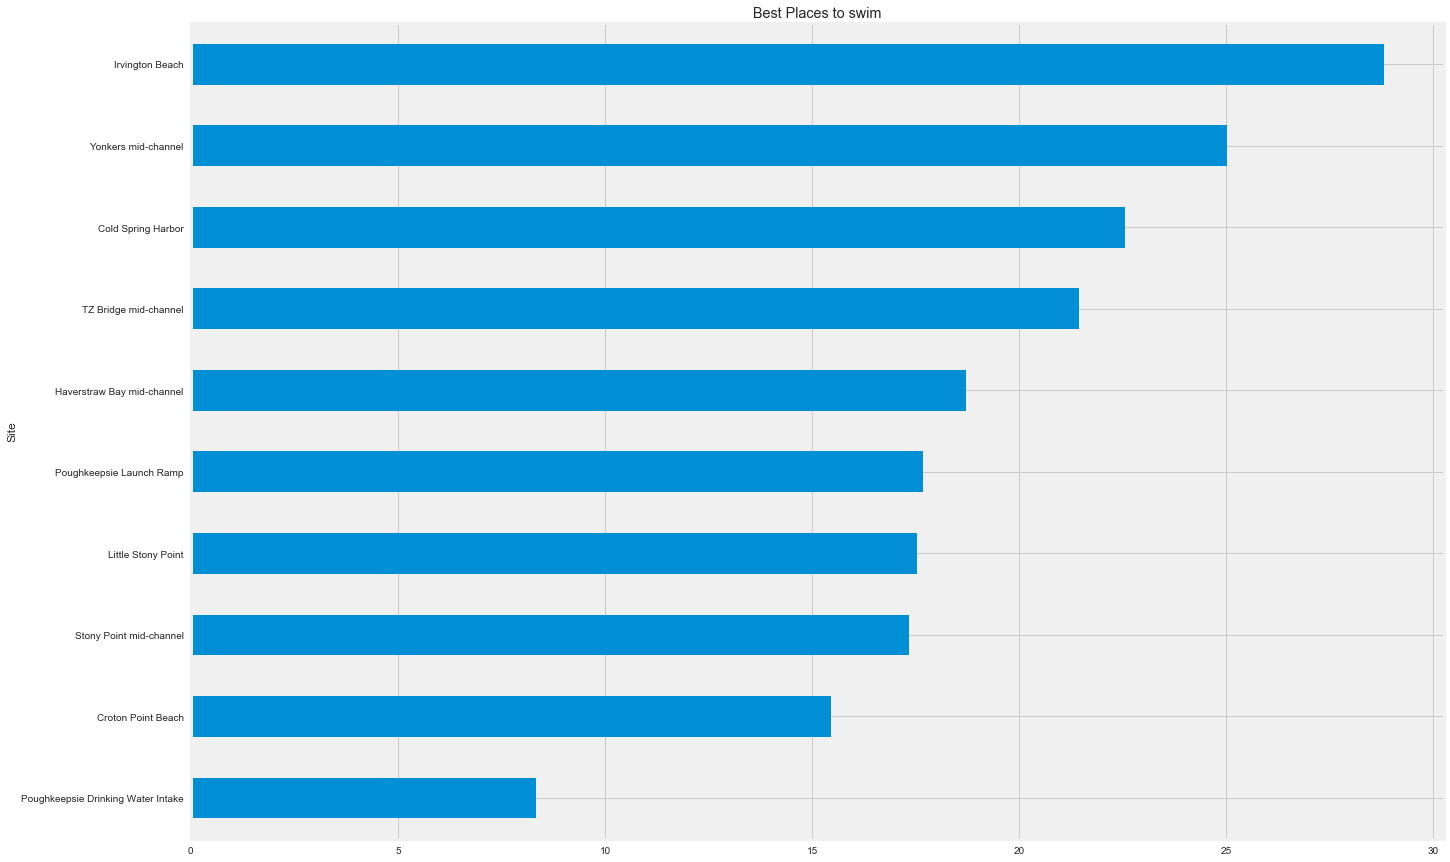

In [4]:
Best_Swim.head(10).plot(kind="barh",title = "Best Places to swim")

In [5]:
Worst_Swim = Data.groupby(['Site'])["EnteroCount"].mean().sort_values(ascending=False)
Worst_Swim.head(10)

Site
Gowanus Canal                              4206.837838
Newtown Creek- Metropolitan Ave. Bridge    2953.684211
Tarrytown Marina                           2205.666667
Saw Mill River                             1455.760000
Upper Sparkill Creek                       1296.072727
Newtown Creek- Dutch Kills                 1205.087719
Kingsland Pt. Park- Pocantico River         907.857143
Orangetown STP Outfall                      854.192982
Mohawk River at Waterford                   621.057143
Piermont Pier                               482.165775
Name: EnteroCount, dtype: float64

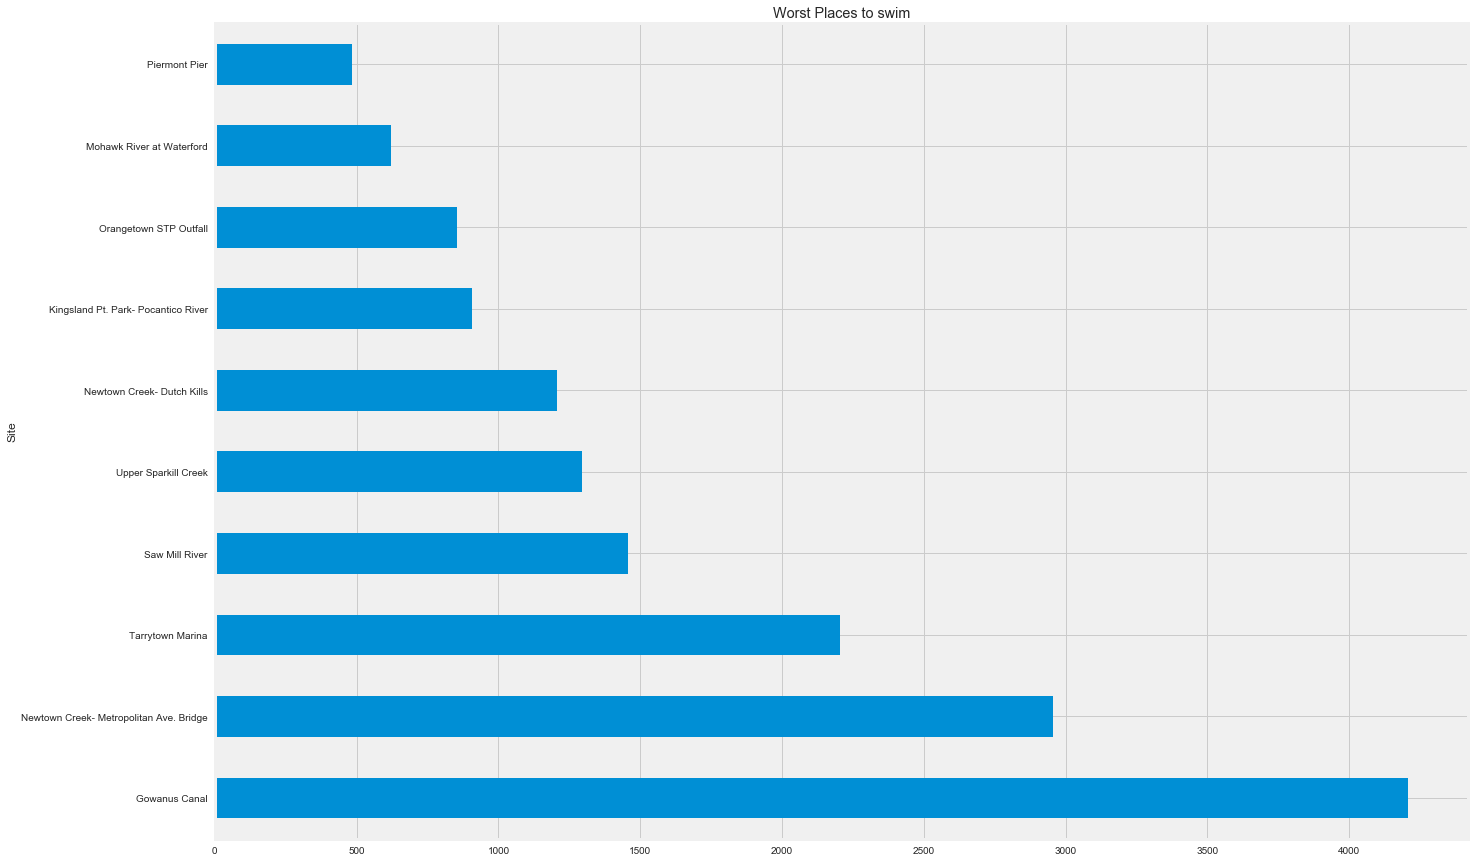

In [6]:
Worst_Swim.head(10).plot(kind="barh",title = "Worst Places to swim")

## The testing of water quality can be sporadic. Which sites have been tested most regularly? 

In [7]:
# site that are tested regularly.
Data.groupby(by=["Site"])["Date"].count().sort_values(ascending=False).head(10)

Site
Piermont Pier                              187
Upper Sparkill Creek                       165
125th St. Pier                              66
Nyack Launch Ramp                           61
TZ Bridge mid-channel                       57
Newtown Creek- Dutch Kills                  57
Newtown Creek- Metropolitan Ave. Bridge     57
Orangetown STP Outfall                      57
Yonkers mid-channel                         52
Yonkers STP Outfall                         51
Name: Date, dtype: int64

## Which ones have long gaps between tests?

In [8]:
Gaps = Data[['Site', 'Date']]
Gaps = Gaps.sort_values(['Site', 'Date'], ascending=[1, 1])

# This formula was provided from user at stackoverflow
#https://stackoverflow.com/questions/41833993/calculate-difference-in-days-between-successive-pandas-datetime-
#values-within-sa

Gaps['Gap_Days'] = (Gaps.groupby('Site', group_keys=False).apply(lambda g: g['Date'].diff().replace(0, np.nan).ffill()))


result = Gaps.groupby(['Site']).max()

#The top 10 sites that had a long gap between testing.
result.sort_values(['Gap_Days'], ascending=[0]).head(10)

,Date,Gap_Days
Site,,
Tarrytown Marina,2013-10-17,334 days
125th St. Pier,2013-10-16,291 days
Gowanus Canal,2013-10-16,281 days
Upper Sparkill Creek,2012-12-10,280 days
East River mid-channel at 23rd St.,2013-10-16,256 days
Yonkers STP Outfall,2013-10-16,256 days
The Battery mid-channel,2013-10-16,256 days
Saw Mill River,2013-10-16,256 days
North River STP at 145th,2013-10-16,256 days


## Pick out 5-10 sites and visually compare how regularly their water quality is tested.¶

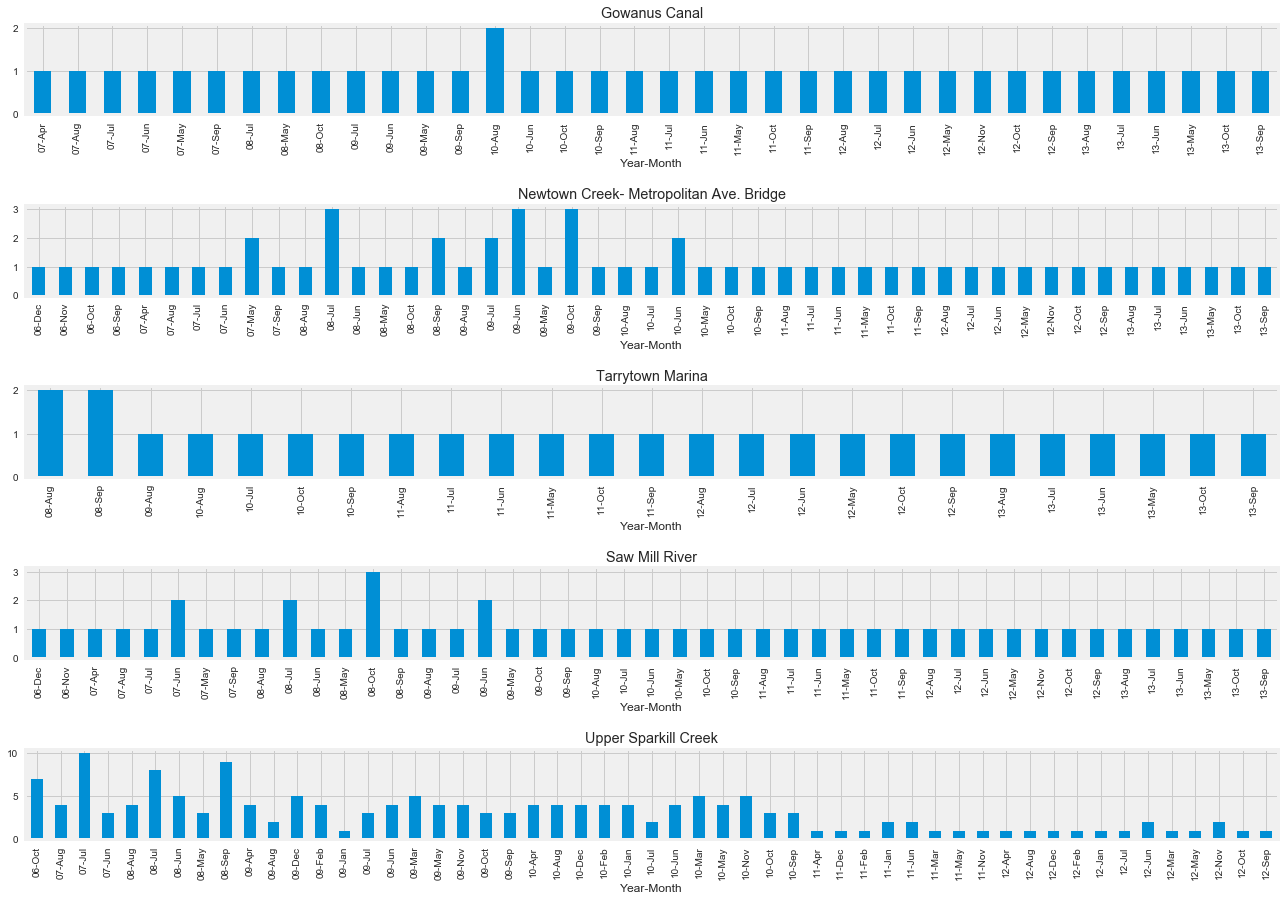

In [9]:
# used top 5 worst river to swim                       
Data['Year-Month'] = Data['Date'].apply(lambda x:x.strftime('%y-%b'))
Gowanus_Canal = Data.query('Site =="Gowanus Canal"')
Newtown_Creek= Data.query('Site =="Newtown Creek- Metropolitan Ave. Bridge"')
Tarrytown_Marina = Data.query('Site =="Tarrytown Marina"')
Saw_Mill_River = Data.query('Site =="Saw Mill River"')                           
Upper_Sparkill_Creek= Data.query('Site =="Upper Sparkill Creek"')


# I used counts in order to see if a site was tested more than once within any given month.

fig, axs = plt.subplots(5)
fig.subplots_adjust(hspace=1)
Gowanus_Canal.groupby(['Year-Month'])["SampleCount"].count().plot(kind='bar',title = "Gowanus Canal", ax=axs[0]) 
Newtown_Creek.groupby(['Year-Month'])["SampleCount"].count().plot(kind='bar',title = "Newtown Creek- Metropolitan Ave. Bridge", ax=axs[1]) 
Tarrytown_Marina.groupby(['Year-Month'])["SampleCount"].count().plot(kind='bar',title = "Tarrytown Marina", ax=axs[2]) 
Saw_Mill_River.groupby(['Year-Month'])["SampleCount"].count().plot(kind='bar',title = "Saw Mill River", ax=axs[3]) 
Upper_Sparkill_Creek.groupby(['Year-Month'])["SampleCount"].count().plot(kind='bar',title = "Upper Sparkill Creek", ax=axs[4]) 

## Is there a relationship between the amount of rain and water quality? Show this relationship graphically.

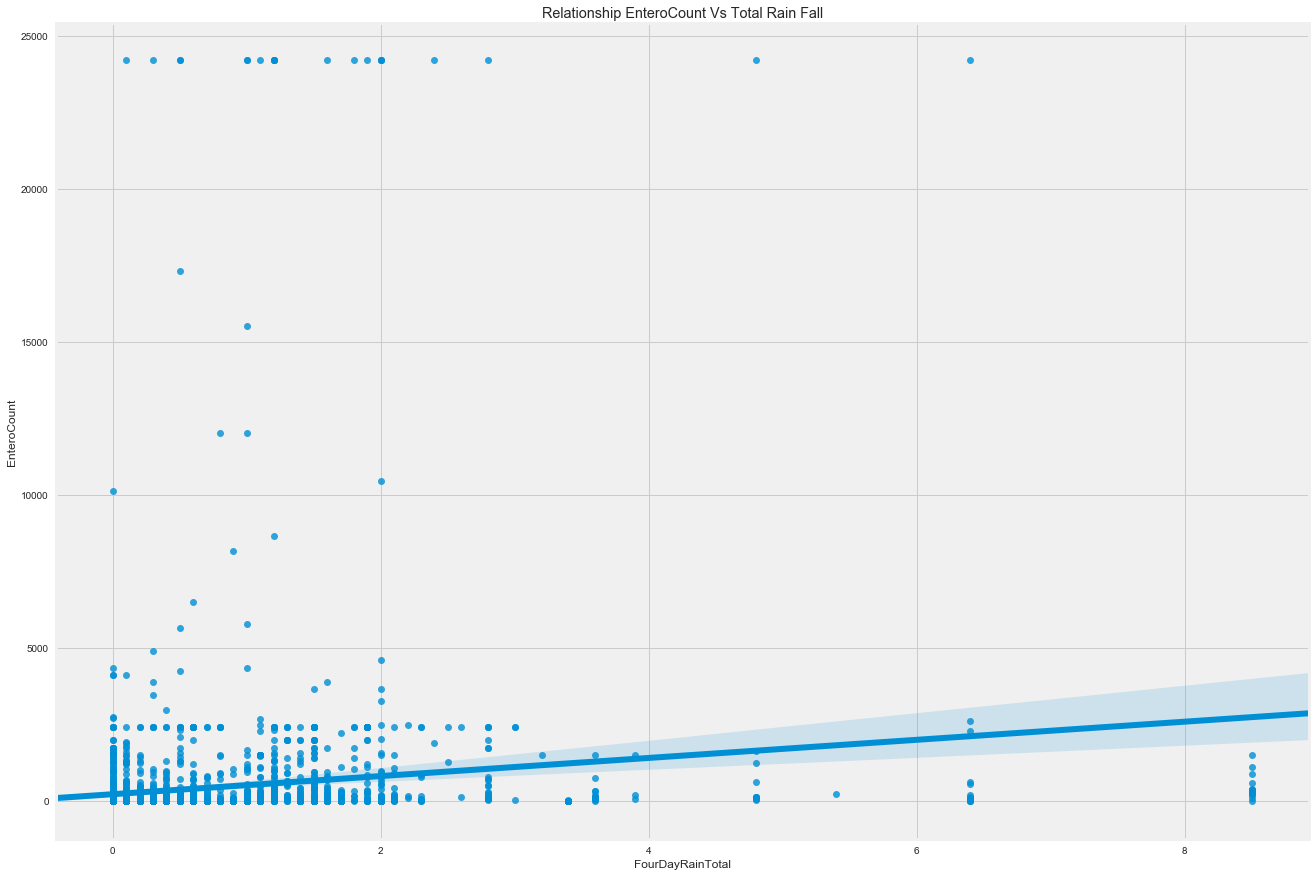

In [10]:
#Data.to_csv('Data.csv')
#EnteroCount
#FourDayRainTotal
Relationship = Data[['EnteroCount','FourDayRainTotal']] 
#Relationship.plot.scatter(x='FourDayRainTotal', y='EnteroCount', c='c', s=50)
sns.regplot(Relationship['FourDayRainTotal'],Relationship['EnteroCount'],title("Relationship EnteroCount Vs Total Rain Fall"))

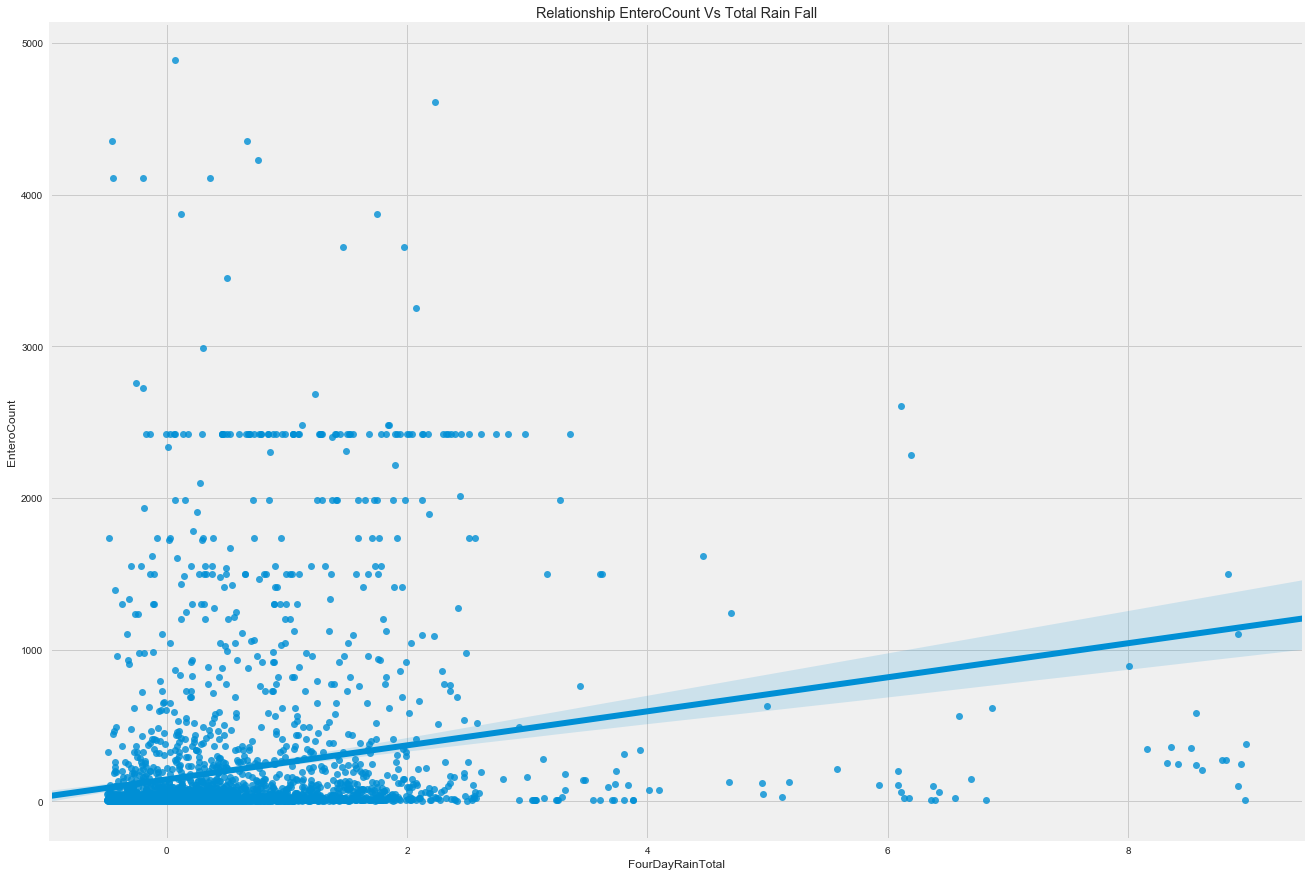

In [11]:
Relationship = Relationship.query('EnteroCount<5000')
sns.regplot(Relationship['FourDayRainTotal'],Relationship['EnteroCount'],title("Relationship EnteroCount Vs Total Rain Fall"),x_jitter=.5)


## Estimate the effect of rain on quality at different sites and create a visualization to compare them.

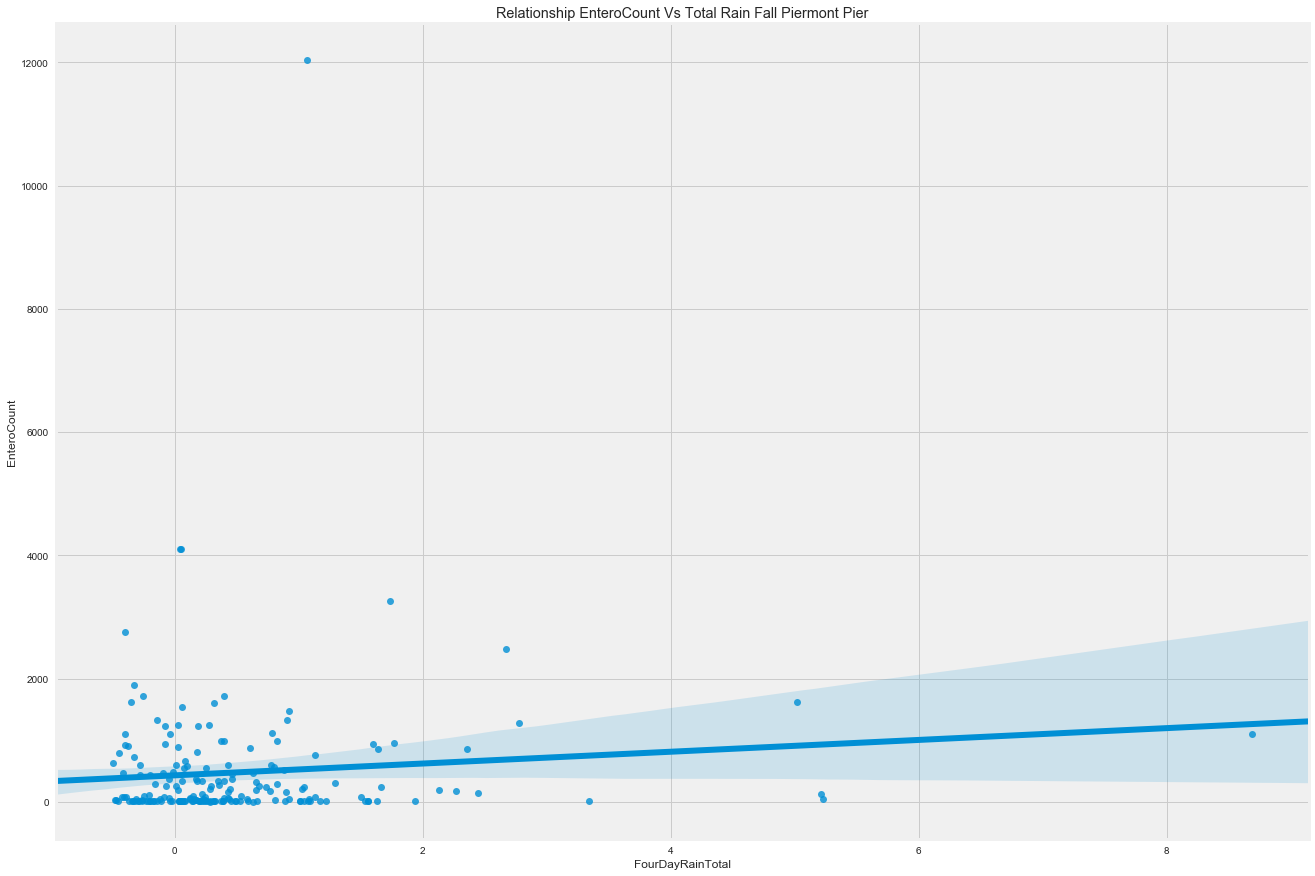

In [12]:
# I picked the two sites with the most occurrences.

Piermont_Pier = Data[(Data.Site =="Piermont Pier")]
Piermont_Pier = Piermont_Pier[['EnteroCount','FourDayRainTotal']] 

sns.regplot(Piermont_Pier['FourDayRainTotal'],Piermont_Pier['EnteroCount'],title("Relationship EnteroCount Vs Total Rain Fall Piermont Pier"),x_jitter=.5)

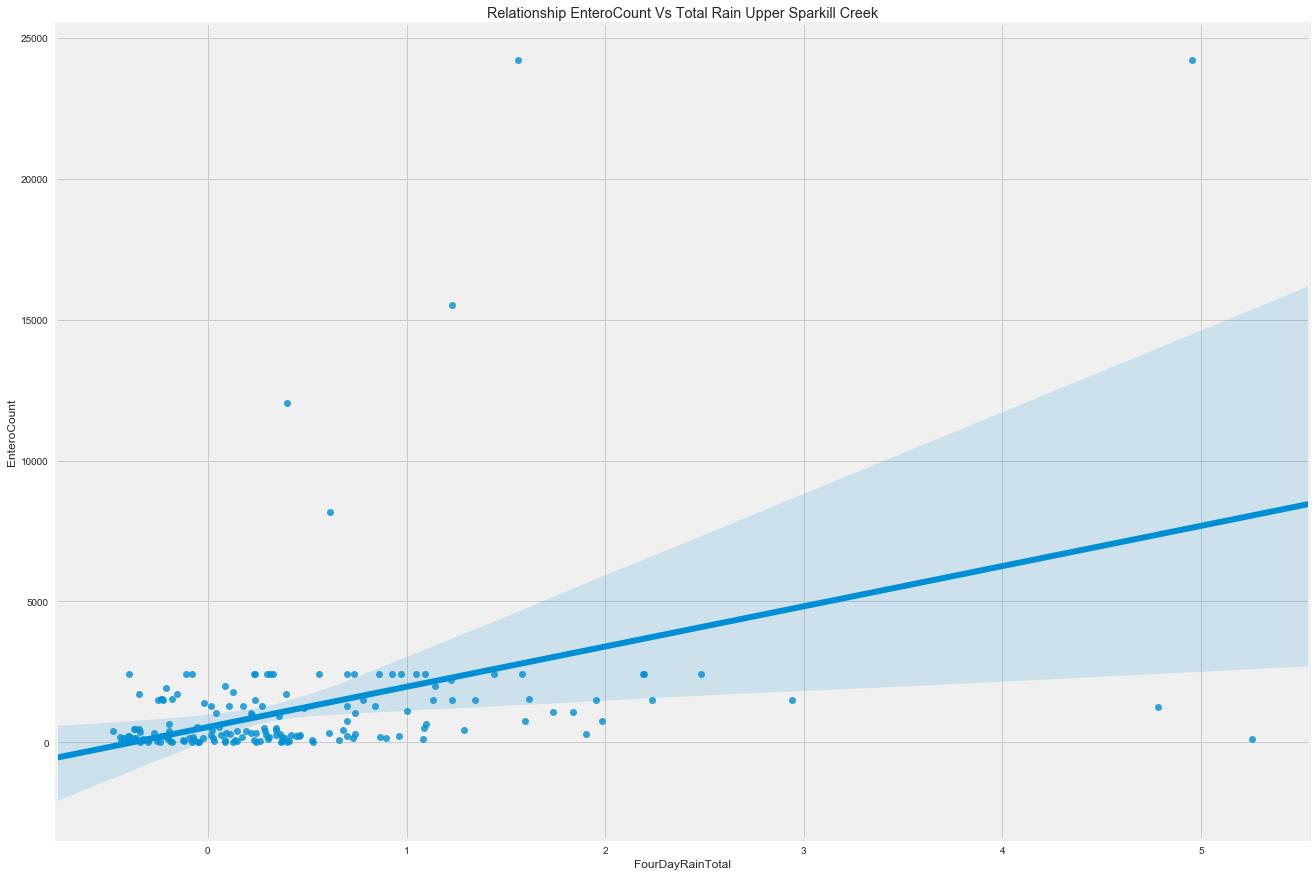

In [13]:
Upper_Sparkill_Creek = Data[(Data.Site =="Upper Sparkill Creek")]
Upper_Sparkill_Creek = Upper_Sparkill_Creek[['EnteroCount','FourDayRainTotal']] 
sns.regplot(Upper_Sparkill_Creek['FourDayRainTotal'],Upper_Sparkill_Creek['EnteroCount'],title("Relationship EnteroCount Vs Total Rain Upper Sparkill Creek"),x_jitter=.5)
#Upper_Sparkill_Creek